In [47]:
from rl_qoc.environment.multi_gate_env import MultiGateEnv, MultiTarget, MultiTargetQEnvConfig
from rl_qoc import InstructionReplacement, QiskitConfig, ExecutionConfig, ChannelReward, BenchmarkConfig
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector

In [48]:
qc1 = QuantumCircuit(4)
qc1.h(range(4))
qc1.cx(0, 1)
qc1.cx(2, 3)


param1 = ParameterVector('theta', 1)
param2 = ParameterVector('phi', 1)
custom_qc1 = QuantumCircuit(2)
custom_qc1.h(0)
custom_qc1.rzz(param1[0], 0, 1)
custom_qc2 = QuantumCircuit(2)
custom_qc2.h(0)
custom_qc2.rzz(param2[0], 0, 1)

instruction_replacements = [InstructionReplacement(('cx', (0, 1)), custom_qc1.to_instruction(label="cx_cal1")), InstructionReplacement(('cx', (2, 3)), custom_qc2.to_instruction(label="cx_cal2"))]

context1 = qc1
multi_target = MultiTarget(instruction_replacements, circuit_contexts=[context1])



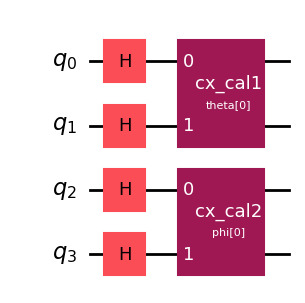

In [49]:
multi_target.custom_circuit().draw("mpl")

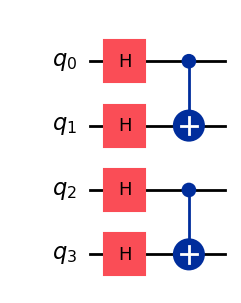

In [50]:
multi_target.gate_targets[0].circuit.draw("mpl")

In [56]:
config = MultiTargetQEnvConfig(
    target=multi_target,
    backend_config=QiskitConfig(),
    execution_config=ExecutionConfig(),
    benchmark_config=BenchmarkConfig(1)
)
config.action_space
# env = MultiGateEnv(config)


Dict('phi[0]': Box(-3.1415927, 3.1415927, (1,), float32), 'theta[0]': Box(-3.1415927, 3.1415927, (1,), float32))

In [ ]:
from rl_qoc import ChannelReward

reward = ChannelReward()

data = reward.get_reward_data_multi_target(multi_target.custom_circuit(), np.zeros((10, 2), ))